In [50]:

#checking
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with tab as the delimiter, and skip the first two rows
file_path = '/content/drive/MyDrive/hexo-ekso data alabama/DM_10_Hot/NoEkso/DM_10_Session2_Shimmer_5470_Calibrated_PC.csv'  # Replace with your actual file path
df = pd.read_csv(file_path, delimiter='\t', skiprows=1)

# Check the first few rows to ensure it's loaded correctly
print(df.head())


  Shimmer_5470_TimestampSync_Unix_CAL Shimmer_5470_EMG_CH1_24BIT_CAL  \
0                                  ms                             mV   
1               1.6367616463152144E12             1.4611841989975214   
2               1.6367616463161907E12              1.461424604426774   
3               1.6367616463171672E12             1.4592609555635003   
4               1.6367616463181438E12             1.4549336578369527   

  Shimmer_5470_EMG_CH2_24BIT_CAL Shimmer_5470_Event_Marker_CAL  Unnamed: 4  
0                             mV                      no_units         NaN  
1              2.163047849700592                             0         NaN  
2              2.163889268702976                            -1         NaN  
3              2.167254944712513                            -1         NaN  
4              2.175909540165608                            -1         NaN  


<ipython-input-50-d9cbf8476625>:7: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t', skiprows=1)


In [13]:
#5470

import pandas as pd

file_path = '/content/drive/MyDrive/hexo-ekso data alabama/DS_8_Room/NoHexo/DS_8_Session2_Shimmer_5470_Calibrated_PC (2).csv'
df = pd.read_csv(file_path, delimiter='\t', skiprows=1, low_memory=False)

df = df.drop(0).reset_index(drop=True)

df['Shimmer_5470_TimestampSync_Unix_CAL'] = pd.to_numeric(df['Shimmer_5470_TimestampSync_Unix_CAL'], errors='coerce')
df['Shimmer_5470_EMG_CH2_24BIT_CAL'] = pd.to_numeric(df['Shimmer_5470_EMG_CH2_24BIT_CAL'], errors='coerce')
df['Shimmer_5470_EMG_CH1_24BIT_CAL'] = pd.to_numeric(df['Shimmer_5470_EMG_CH1_24BIT_CAL'], errors='coerce')
df['Shimmer_5470_Event_Marker_CAL'] = pd.to_numeric(df['Shimmer_5470_Event_Marker_CAL'], errors='coerce')

df.dropna(subset=['Shimmer_5470_TimestampSync_Unix_CAL'], inplace=True)
df['Shimmer_5470_TimestampSync_Unix_CAL'] = pd.to_datetime(df['Shimmer_5470_TimestampSync_Unix_CAL'], unit='ms')

df.head()


,Shimmer_5470_TimestampSync_Unix_CAL,Shimmer_5470_EMG_CH1_24BIT_CAL,Shimmer_5470_EMG_CH2_24BIT_CAL,Shimmer_5470_Event_Marker_CAL,Unnamed: 4
0,2021-12-07 19:01:15.991291392,-6.314249,4.362397,0,NaN
1,2021-12-07 19:01:15.992244992,-6.296338,4.387279,-1,NaN
2,2021-12-07 19:01:15.993197824,-6.358483,4.400020,-1,NaN
3,2021-12-07 19:01:15.994150912,-6.362931,4.456516,-1,NaN
4,2021-12-07 19:01:15.995103744,-6.311845,4.505198,-1,NaN


In [1]:
#4680

import pandas as pd

file_path = '/content/drive/MyDrive/hexo-ekso data alabama/DS_8_Room/NoHexo/DS_8_Session2_Shimmer_4680_Calibrated_PC (1).csv'
df = pd.read_csv(file_path, delimiter='\t', skiprows=1, low_memory=False)

df = df.drop(0).reset_index(drop=True)

df['Shimmer_4680_TimestampSync_Unix_CAL'] = pd.to_numeric(df['Shimmer_4680_TimestampSync_Unix_CAL'], errors='coerce')
df['Shimmer_4680_EMG_CH2_24BIT_CAL'] = pd.to_numeric(df['Shimmer_4680_EMG_CH2_24BIT_CAL'], errors='coerce')
df['Shimmer_4680_EMG_CH1_24BIT_CAL'] = pd.to_numeric(df['Shimmer_4680_EMG_CH1_24BIT_CAL'], errors='coerce')
df['Shimmer_4680_Event_Marker_CAL'] = pd.to_numeric(df['Shimmer_4680_Event_Marker_CAL'], errors='coerce')


df.dropna(subset=['Shimmer_4680_TimestampSync_Unix_CAL'], inplace=True)
df['Shimmer_4680_TimestampSync_Unix_CAL'] = pd.to_datetime(df['Shimmer_4680_TimestampSync_Unix_CAL'], unit='ms')

df.head()


,Shimmer_4680_TimestampSync_Unix_CAL,Shimmer_4680_EMG_CH1_24BIT_CAL,Shimmer_4680_EMG_CH2_24BIT_CAL,Shimmer_4680_Event_Marker_CAL,Unnamed: 4
0,2021-12-07 19:01:16.002019328,12.111986,-7.814018,0,NaN
1,2021-12-07 19:01:16.002995968,12.111866,-7.795627,-1,NaN
2,2021-12-07 19:01:16.003972352,12.124127,-7.738290,-1,NaN
3,2021-12-07 19:01:16.004948992,12.127252,-7.720500,-1,NaN
4,2021-12-07 19:01:16.005925632,12.124728,-7.782885,-1,NaN


In [2]:
#4680
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def apply_lowpass_filter(data, lowcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    b, a = butter(order, low, btype='low')
    y = filtfilt(b, a, data)
    return y

# Sampling frequency
fs = 1024
lowcut = 20.0
highcut = 450.0
lowpass_cutoff = 3.0  # Lowpass filter cutoff frequency for smoothing

# Remove offset to reset baseline to zero
df['Corrected_EMG_CH1'] = df['Shimmer_4680_EMG_CH1_24BIT_CAL'] - np.mean(df['Shimmer_4680_EMG_CH1_24BIT_CAL'])
df['Corrected_EMG_CH2'] = df['Shimmer_4680_EMG_CH2_24BIT_CAL'] - np.mean(df['Shimmer_4680_EMG_CH2_24BIT_CAL'])

# Apply bandpass filter to corrected EMG data
df['Filtered_EMG_CH1'] = bandpass_filter(df['Corrected_EMG_CH1'], lowcut, highcut, fs)
df['Filtered_EMG_CH2'] = bandpass_filter(df['Corrected_EMG_CH2'], lowcut, highcut, fs)

# Rectify the bandpass filtered EMG signal
df['Rectified_EMG_CH1'] = np.abs(df['Filtered_EMG_CH1'])
df['Rectified_EMG_CH2'] = np.abs(df['Filtered_EMG_CH2'])

# Apply lowpass filter to rectified signal to get EMG envelope
df['EMG_Envelope_CH1'] = apply_lowpass_filter(df['Rectified_EMG_CH1'], lowpass_cutoff, fs)
df['EMG_Envelope_CH2'] = apply_lowpass_filter(df['Rectified_EMG_CH2'], lowpass_cutoff, fs)

# RMS Calculation remains the same (optional)
window_size = int(0.1 * fs)  # 100 ms window

def calculate_rms(data, window_size):
    rms_data = np.sqrt(np.convolve(data**2, np.ones(window_size)/window_size, mode='valid'))
    return np.pad(rms_data, (window_size-1, 0), mode='edge')

df['RMS_EMG_CH1'] = calculate_rms(df['EMG_Envelope_CH1'], window_size)
df['RMS_EMG_CH2'] = calculate_rms(df['EMG_Envelope_CH2'], window_size)


In [14]:
#5470
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def apply_lowpass_filter(data, lowcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    b, a = butter(order, low, btype='low')
    y = filtfilt(b, a, data)
    return y

# Sampling frequency
fs = 1024
lowcut = 20.0
highcut = 450.0
lowpass_cutoff = 3.0  # Lowpass filter cutoff frequency for smoothing

# Remove offset to reset baseline to zero
df['Corrected_EMG_CH1'] = df['Shimmer_5470_EMG_CH1_24BIT_CAL'] - np.mean(df['Shimmer_5470_EMG_CH1_24BIT_CAL'])
df['Corrected_EMG_CH2'] = df['Shimmer_5470_EMG_CH2_24BIT_CAL'] - np.mean(df['Shimmer_5470_EMG_CH2_24BIT_CAL'])

# Apply bandpass filter to corrected EMG data
df['Filtered_EMG_CH1'] = bandpass_filter(df['Corrected_EMG_CH1'], lowcut, highcut, fs)
df['Filtered_EMG_CH2'] = bandpass_filter(df['Corrected_EMG_CH2'], lowcut, highcut, fs)

# Rectify the bandpass filtered EMG signal
df['Rectified_EMG_CH1'] = np.abs(df['Filtered_EMG_CH1'])
df['Rectified_EMG_CH2'] = np.abs(df['Filtered_EMG_CH2'])

# Apply lowpass filter to rectified signal to get EMG envelope
df['EMG_Envelope_CH1'] = apply_lowpass_filter(df['Rectified_EMG_CH1'], lowpass_cutoff, fs)
df['EMG_Envelope_CH2'] = apply_lowpass_filter(df['Rectified_EMG_CH2'], lowpass_cutoff, fs)

# RMS Calculation remains the same (optional)
window_size = int(0.1 * fs)  # 100 ms window

def calculate_rms(data, window_size):
    rms_data = np.sqrt(np.convolve(data**2, np.ones(window_size)/window_size, mode='valid'))
    return np.pad(rms_data, (window_size-1, 0), mode='edge')

df['RMS_EMG_CH1'] = calculate_rms(df['EMG_Envelope_CH1'], window_size)
df['RMS_EMG_CH2'] = calculate_rms(df['EMG_Envelope_CH2'], window_size)


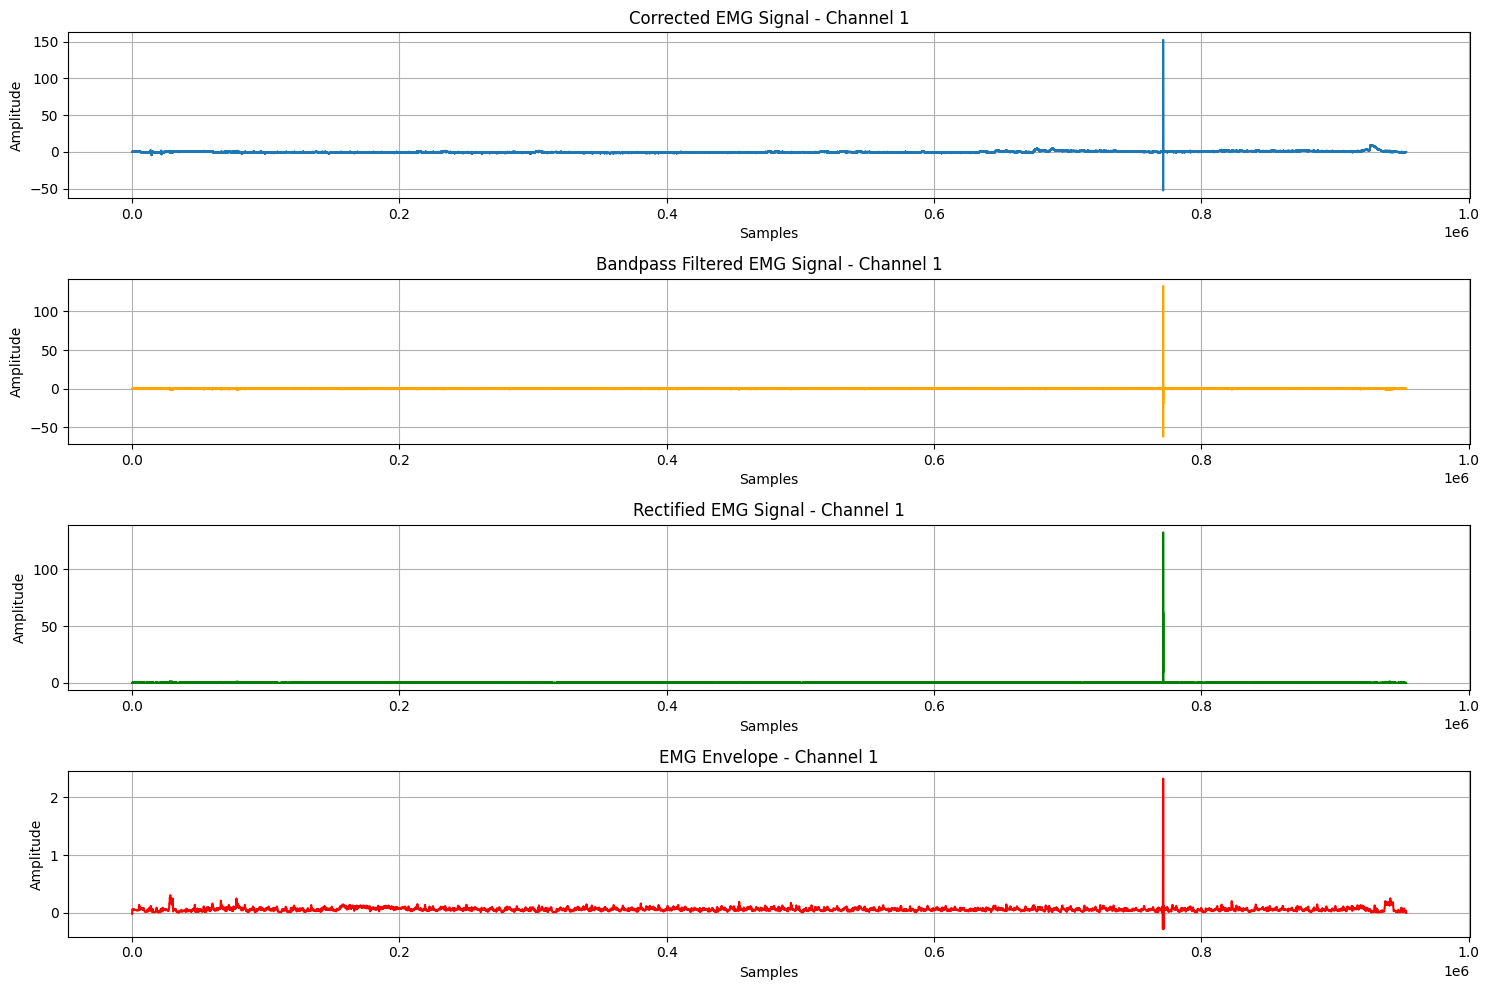

In [15]:

#plotting can be used for both sensors
import matplotlib.pyplot as plt

# Plot the original, filtered, rectified, and envelope signals for Channel 1
plt.figure(figsize=(15, 10))

# Original EMG signal
plt.subplot(4, 1, 1)
plt.plot(df['Corrected_EMG_CH1'], label='Corrected EMG CH1')
plt.title('Corrected EMG Signal - Channel 1')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)

# Bandpass filtered EMG signal
plt.subplot(4, 1, 2)
plt.plot(df['Filtered_EMG_CH1'], label='Filtered EMG CH1', color='orange')
plt.title('Bandpass Filtered EMG Signal - Channel 1')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)

# Rectified EMG signal
plt.subplot(4, 1, 3)
plt.plot(df['Rectified_EMG_CH1'], label='Rectified EMG CH1', color='green')
plt.title('Rectified EMG Signal - Channel 1')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)

# EMG envelope
plt.subplot(4, 1, 4)
plt.plot(df['EMG_Envelope_CH1'], label='EMG Envelope CH1', color='red')
plt.title('EMG Envelope - Channel 1')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


0       2021-12-07 19:01:15.991291392
1       2021-12-07 19:01:15.992244992
2       2021-12-07 19:01:15.993197824
3       2021-12-07 19:01:15.994150912
4       2021-12-07 19:01:15.995103744
                     ...             
48738   2021-12-07 19:02:15.986758400
48739   2021-12-07 19:02:15.987711488
48740   2021-12-07 19:02:15.988664320
48741   2021-12-07 19:02:15.989617408
48742   2021-12-07 19:02:15.990570240
Name: Datetime, Length: 48743, dtype: datetime64[ns]


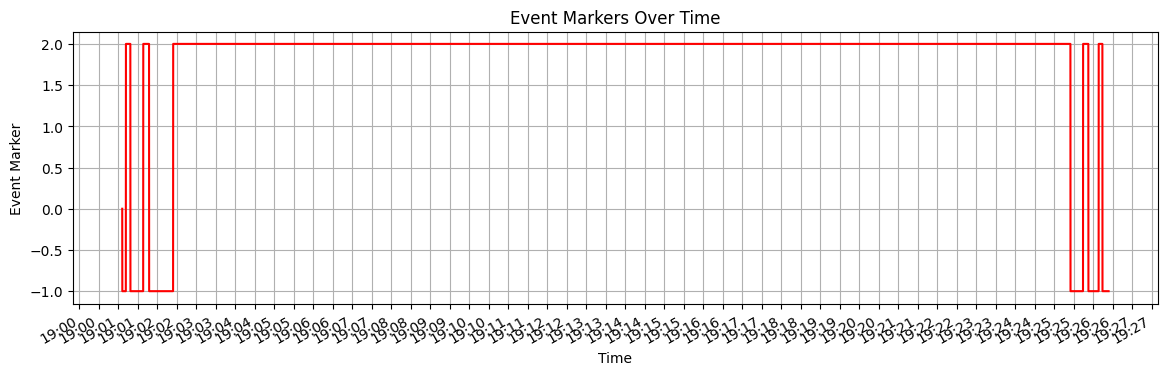

,Shimmer_5470_TimestampSync_Unix_CAL,Shimmer_5470_EMG_CH1_24BIT_CAL,Shimmer_5470_EMG_CH2_24BIT_CAL,Shimmer_5470_Event_Marker_CAL,Unnamed: 4,Corrected_EMG_CH1,Corrected_EMG_CH2,Filtered_EMG_CH1,Filtered_EMG_CH2,Rectified_EMG_CH1,Rectified_EMG_CH2,EMG_Envelope_CH1,EMG_Envelope_CH2,RMS_EMG_CH1,RMS_EMG_CH2,Datetime
0,2021-12-07 19:01:15.991291392,-6.314249,4.362397,0,NaN,0.156822,-1.739412,0.002553,-0.007804,0.002553,0.007804,-0.020367,0.024320,0.026946,0.046322,2021-12-07 19:01:15.991291392
1,2021-12-07 19:01:15.992244992,-6.296338,4.387279,-1,NaN,0.174732,-1.714530,0.020464,0.011830,0.020464,0.011830,-0.019488,0.024813,0.026946,0.046322,2021-12-07 19:01:15.992244992
2,2021-12-07 19:01:15.993197824,-6.358483,4.400020,-1,NaN,0.112587,-1.701789,-0.036297,0.023498,0.036297,0.023498,-0.018611,0.025306,0.026946,0.046322,2021-12-07 19:01:15.993197824
3,2021-12-07 19:01:15.994150912,-6.362931,4.456516,-1,NaN,0.108140,-1.645294,-0.045609,0.071371,0.045609,0.071371,-0.017735,0.025798,0.026946,0.046322,2021-12-07 19:01:15.994150912
4,2021-12-07 19:01:15.995103744,-6.311845,4.505198,-1,NaN,0.159226,-1.596612,0.014383,0.122242,0.014383,0.122242,-0.016860,0.026289,0.026946,0.046322,2021-12-07 19:01:15.995103744


In [16]:
#5470
# Convert Unix timestamp to datetime
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
df['Datetime'] = pd.to_datetime(df['Shimmer_5470_TimestampSync_Unix_CAL'], unit='ms')

start_time = df['Datetime'].min()

# Define the end time (5 minutes from the start time)
end_time = start_time + pd.Timedelta(minutes=1)

# Filter the dataframe to get the first 5 minutes of data
first_5_mins = df[(df['Datetime'] >= start_time) & (df['Datetime'] <= end_time)]

# Print the 'Datetime' column for the first 5 minutes
print(first_5_mins['Datetime'])

#print(df['Datetime'])
# Prepare event markers for plotting
event_markers = df['Shimmer_5470_Event_Marker_CAL']  # Keep as it is for spikes

# Plot Event Markers as spikes over time
plt.figure(figsize=(14, 4))

# Plot a line for event markers to create the spikes effect
plt.plot(df['Datetime'], event_markers, color='red')

# Set the x-axis major formatter to show hours and minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the x-axis locator to 5-minute intervals
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=30))

# Rotate and align the tick labels on the x-axis
plt.gcf().autofmt_xdate()

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Event Marker')
plt.title('Event Markers Over Time')

# Show the plot with grid for better visibility of spikes
plt.grid(True)

# Show the plot
plt.show()
df.head()

0       2021-12-07 19:01:16.002019328
1       2021-12-07 19:01:16.002995968
2       2021-12-07 19:01:16.003972352
3       2021-12-07 19:01:16.004948992
4       2021-12-07 19:01:16.005925632
                     ...             
59583   2021-12-07 19:02:15.997726464
59584   2021-12-07 19:02:15.998702848
59585   2021-12-07 19:02:15.999679488
59586   2021-12-07 19:02:16.000656128
59587   2021-12-07 19:02:16.001632512
Name: Datetime, Length: 59588, dtype: datetime64[ns]


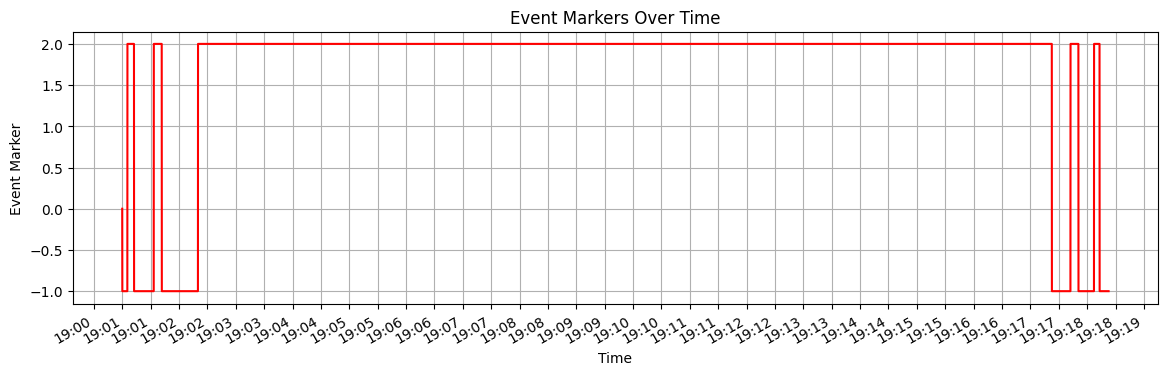

,Shimmer_4680_TimestampSync_Unix_CAL,Shimmer_4680_EMG_CH1_24BIT_CAL,Shimmer_4680_EMG_CH2_24BIT_CAL,Shimmer_4680_Event_Marker_CAL,Unnamed: 4,Corrected_EMG_CH1,Corrected_EMG_CH2,Filtered_EMG_CH1,Filtered_EMG_CH2,Rectified_EMG_CH1,Rectified_EMG_CH2,EMG_Envelope_CH1,EMG_Envelope_CH2,RMS_EMG_CH1,RMS_EMG_CH2,Datetime
0,2021-12-07 19:01:16.002019328,12.111986,-7.814018,0,NaN,-0.617067,-1.425977,-0.001433,-0.006539,0.001433,0.006539,0.006788,0.003264,0.015933,0.026464,2021-12-07 19:01:16.002019328
1,2021-12-07 19:01:16.002995968,12.111866,-7.795627,-1,NaN,-0.617187,-1.407586,-0.003653,0.013461,0.003653,0.013461,0.006962,0.003733,0.015933,0.026464,2021-12-07 19:01:16.002995968
2,2021-12-07 19:01:16.003972352,12.124127,-7.738290,-1,NaN,-0.604926,-1.350249,0.006244,0.077204,0.006244,0.077204,0.007136,0.004203,0.015933,0.026464,2021-12-07 19:01:16.003972352
3,2021-12-07 19:01:16.004948992,12.127252,-7.720500,-1,NaN,-0.601801,-1.332459,0.007575,0.092447,0.007575,0.092447,0.007310,0.004671,0.015933,0.026464,2021-12-07 19:01:16.004948992
4,2021-12-07 19:01:16.005925632,12.124728,-7.782885,-1,NaN,-0.604325,-1.394844,0.002669,0.039727,0.002669,0.039727,0.007485,0.005140,0.015933,0.026464,2021-12-07 19:01:16.005925632


In [5]:
#4680
# Convert Unix timestamp to datetime
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
df['Datetime'] = pd.to_datetime(df['Shimmer_4680_TimestampSync_Unix_CAL'], unit='ms')

start_time = df['Datetime'].min()
#start_time = start_time + pd.Timedelta(minutes=1)
# Define the end time (5 minutes from the start time)
end_time = start_time + pd.Timedelta(minutes=1)

# Filter the dataframe to get the first 5 minutes of data
first_5_mins = df[(df['Datetime'] >= start_time) & (df['Datetime'] <= end_time)]

# Print the 'Datetime' column for the first 5 minutes
print(first_5_mins['Datetime'])

#print(df['Datetime'])
# Prepare event markers for plotting
event_markers = df['Shimmer_4680_Event_Marker_CAL']  # Keep as it is for spikes

# Plot Event Markers as spikes over time
plt.figure(figsize=(14, 4))

# Plot a line for event markers to create the spikes effect
plt.plot(df['Datetime'], event_markers, color='red')

# Set the x-axis major formatter to show hours and minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the x-axis locator to 5-minute intervals
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=30))

# Rotate and align the tick labels on the x-axis
plt.gcf().autofmt_xdate()

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Event Marker')
plt.title('Event Markers Over Time')

# Show the plot with grid for better visibility of spikes
plt.grid(True)

# Show the plot
plt.show()
df.head()

In [6]:
#4680
#90th percentile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume you identified the MVC start and end times visually (replace these with your actual values)
mvc_start_time = ' 2021-12-07 19:01:16.002019328' # Start time with microseconds
mvc_end_time = '2021-12-07 19:02:16.001632512'   # End time with microseconds

# Convert timestamps to datetime for filtering and round to seconds
df['Datetime'] = pd.to_datetime(df['Shimmer_4680_TimestampSync_Unix_CAL'], unit='ms').dt.round('S')

# Filter data within the MVC time range
mvc_data_ch1 = df[(df['Datetime'] >= mvc_start_time) & (df['Datetime'] <= mvc_end_time)]['RMS_EMG_CH1']
mvc_data_ch2 = df[(df['Datetime'] >= mvc_start_time) & (df['Datetime'] <= mvc_end_time)]['RMS_EMG_CH2']

# Calculate the peak (maximum) RMS value within the identified MVC time range
mvc_ch1 = mvc_data_ch1.max()
mvc_ch2 = mvc_data_ch2.max()

print(f"MVC Peak for Channel 1: {mvc_ch1}")
print(f"MVC Peak for Channel 2: {mvc_ch2}")
df = df[df['Shimmer_4680_Event_Marker_CAL'] != -1]
# Now calculate the 90th percentile of the RMS values during the drilling task
# (Assume you have the drilling task time range, replace with actual values)
drilling_start_time = '2021-12-07 19:02:50.0'  # Example value
drilling_end_time = '2021-12-07 19:17:30.0'    # Example value

# Filter data within the drilling task time range
drilling_data_ch1 = df[(df['Datetime'] >= drilling_start_time) & (df['Datetime'] <= drilling_end_time)]['RMS_EMG_CH1']
drilling_data_ch2 = df[(df['Datetime'] >= drilling_start_time) & (df['Datetime'] <= drilling_end_time)]['RMS_EMG_CH2']

# Calculate the 90th percentile of the drilling task RMS values
percentile_90_ch1 = np.percentile(drilling_data_ch1.dropna(), 90)
percentile_90_ch2 = np.percentile(drilling_data_ch2.dropna(), 90)

print(f"90th Percentile for Drilling Task, Channel 1: {percentile_90_ch1}")
print(f"90th Percentile for Drilling Task, Channel 2: {percentile_90_ch2}")

# Normalize the 90th percentile value by the MVC peak value and express it as a percentage of MVC
df['PercentMVC_CH1'] = (percentile_90_ch1 / mvc_ch1) * 100
df['PercentMVC_CH2'] = (percentile_90_ch2 / mvc_ch2) * 100

# Output the normalized percentage values for verification
print(f"Percentage of MVC for Channel 1: {df['PercentMVC_CH1'].iloc[0]}%")
print(f"Percentage of MVC for Channel 2: {df['PercentMVC_CH2'].iloc[0]}%")

# Debug: Inspect the calculated %MVC values
print(df[['PercentMVC_CH1', 'PercentMVC_CH2']].head())



MVC Peak for Channel 1: 0.2293371300378933
MVC Peak for Channel 2: 0.3297241853230586
90th Percentile for Drilling Task, Channel 1: 0.06346066424323511
90th Percentile for Drilling Task, Channel 2: 0.0742062443628286
Percentage of MVC for Channel 1: 27.671343158759125%
Percentage of MVC for Channel 2: 22.505550901618722%
      PercentMVC_CH1  PercentMVC_CH2
0          27.671343       22.505551
5534       27.671343       22.505551
5535       27.671343       22.505551
5536       27.671343       22.505551
5537       27.671343       22.505551


In [17]:

#90th percentile
#5470

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume you identified the MVC start and end times visually (replace these with your actual values)
mvc_start_time = ' 2021-12-07 19:01:16.002019328' # Start time with microseconds
mvc_end_time = '2021-12-07 19:02:16.001632512'   # End time with microseconds
# Convert timestamps to datetime for filtering and round to seconds
df['Datetime'] = pd.to_datetime(df['Shimmer_5470_TimestampSync_Unix_CAL'], unit='ms').dt.round('S')

# Filter data within the MVC time range
mvc_data_ch1 = df[(df['Datetime'] >= mvc_start_time) & (df['Datetime'] <= mvc_end_time)]['RMS_EMG_CH1']
mvc_data_ch2 = df[(df['Datetime'] >= mvc_start_time) & (df['Datetime'] <= mvc_end_time)]['RMS_EMG_CH2']

# Calculate the peak (maximum) RMS value within the identified MVC time range
mvc_ch1 = mvc_data_ch1.max()
mvc_ch2 = mvc_data_ch2.max()


print(f"MVC Peak for Channel 1: {mvc_ch1}")
print(f"MVC Peak for Channel 2: {mvc_ch2}")

df = df[df['Shimmer_5470_Event_Marker_CAL'] != -1]

# Now calculate the 90th percentile of the RMS values during the drilling task
# (Assume you have the drilling task time range, replace with actual values)
# (Assume you have the drilling task time range, replace with actual values)
drilling_start_time = '2021-12-07 19:02:50.0'  # Example value
drilling_end_time = '2021-12-07 19:25:0.0'    # Example value


# Filter data within the drilling task time range
drilling_data_ch1 = df[(df['Datetime'] >= drilling_start_time) & (df['Datetime'] <= drilling_end_time)]['RMS_EMG_CH1']
drilling_data_ch2 = df[(df['Datetime'] >= drilling_start_time) & (df['Datetime'] <= drilling_end_time)]['RMS_EMG_CH2']

# Calculate the 90th percentile of the drilling task RMS values
percentile_90_ch1 = np.percentile(drilling_data_ch1.dropna(), 90)
percentile_90_ch2 = np.percentile(drilling_data_ch2.dropna(), 90)

print(f"90th Percentile for Drilling Task, Channel 1: {percentile_90_ch1}")
print(f"90th Percentile for Drilling Task, Channel 2: {percentile_90_ch2}")

# Normalize the 90th percentile value by the MVC peak value and express it as a percentage of MVC
df['PercentMVC_CH1'] = (percentile_90_ch1 / mvc_ch1) * 100
df['PercentMVC_CH2'] = (percentile_90_ch2 / mvc_ch2) * 100

# Output the normalized percentage values for verification
print(f"Percentage of MVC for Channel 1: {df['PercentMVC_CH1'].iloc[0]}%")
print(f"Percentage of MVC for Channel 2: {df['PercentMVC_CH2'].iloc[0]}%")

# Debug: Inspect the calculated %MVC values
print(df[['PercentMVC_CH1', 'PercentMVC_CH2']].head())


MVC Peak for Channel 1: 0.2978406685597683
MVC Peak for Channel 2: 0.47615033229971737
90th Percentile for Drilling Task, Channel 1: 0.08815312026264709
90th Percentile for Drilling Task, Channel 2: 0.1827331369238215
Percentage of MVC for Channel 1: 29.597408805492663%
Percentage of MVC for Channel 2: 38.37719403476093%
      PercentMVC_CH1  PercentMVC_CH2
0          29.597409       38.377194
5684       29.597409       38.377194
5685       29.597409       38.377194
5686       29.597409       38.377194
5687       29.597409       38.377194


In [18]:
#can be used for both devices
mean_percent_ch1 = df['PercentMVC_CH1'].mean()
mean_percent_ch2 = df['PercentMVC_CH2'].mean()

print(f"Mean %MVC for Channel 1: {mean_percent_ch1}%")
print(f"Mean %MVC for Channel 2: {mean_percent_ch2}%")

Mean %MVC for Channel 1: 29.597408805492698%
Mean %MVC for Channel 2: 38.377194034761004%
